In [15]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
anime_df = pd.read_csv("anime_with_synopsis.csv")
anime_df.head()

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


In [6]:
#Exploratory Data Analysis

#Check for null values
anime_df.isnull().sum()
anime_df.info
anime_df.describe(include="all")

,MAL_ID,Name,Score,Genres,sypnopsis
count,16214.000000,16214,16214,16214,16206
unique,NaN,16210,532,4857,15221
top,NaN,Maou Gakuin no Futekigousha: Shijou Saikyou no...,Unknown,Music,No synopsis information has been added to this...
freq,NaN,3,5123,790,709
mean,22069.271555,NaN,NaN,NaN,NaN
std,14849.798248,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,6728.500000,NaN,NaN,NaN,NaN
50%,24164.000000,NaN,NaN,NaN,NaN
75%,35978.750000,NaN,NaN,NaN,NaN


In [7]:
#Data Cleaning and preprocessing
clean_data = anime_df.dropna(axis=0)
print(clean_data.isnull().sum()/len(anime_df)*100)
print(f"Total number of records: {len(anime_df)}")

MAL_ID       0.0
Name         0.0
Score        0.0
Genres       0.0
sypnopsis    0.0
dtype: float64
Total number of records: 16214


In [8]:
anime_df.describe(include="all")

,MAL_ID,Name,Score,Genres,sypnopsis
count,16214.000000,16214,16214,16214,16206
unique,NaN,16210,532,4857,15221
top,NaN,Maou Gakuin no Futekigousha: Shijou Saikyou no...,Unknown,Music,No synopsis information has been added to this...
freq,NaN,3,5123,790,709
mean,22069.271555,NaN,NaN,NaN,NaN
std,14849.798248,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,6728.500000,NaN,NaN,NaN,NaN
50%,24164.000000,NaN,NaN,NaN,NaN
75%,35978.750000,NaN,NaN,NaN,NaN


In [9]:
anime_df.info
#Removing "Unknwon" scores from list
anime_df['Score'] = anime_df['Score'].str.replace(r'Unknown','')
print(anime_df)

       MAL_ID                             Name Score   
0           1                     Cowboy Bebop  8.78  \
1           5  Cowboy Bebop: Tengoku no Tobira  8.39   
2           6                           Trigun  8.24   
3           7               Witch Hunter Robin  7.27   
4           8                   Bouken Ou Beet  6.98   
...       ...                              ...   ...   
16209   48481  Daomu Biji Zhi Qinling Shen Shu         
16210   48483                     Mieruko-chan         
16211   48488  Higurashi no Naku Koro ni Sotsu         
16212   48491      Yama no Susume: Next Summit         
16213   48492                    Scarlet Nexus         

                                                  Genres   
0        Action, Adventure, Comedy, Drama, Sci-Fi, Space  \
1                  Action, Drama, Mystery, Sci-Fi, Space   
2      Action, Sci-Fi, Adventure, Comedy, Drama, Shounen   
3      Action, Mystery, Police, Supernatural, Drama, ...   
4              Adventure, F

In [10]:
anime_df.sort_values(by = 'Score', ascending= False)

,MAL_ID,Name,Score,Genres,sypnopsis
3446,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...","""In order for something to be obtained, someth..."
14647,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",Gabi Braun and Falco Grice have been training ...
4953,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",The self-proclaimed mad scientist Rintarou Oka...
13720,38524,Shingeki no Kyojin Season 3 Part 2,9.1,"Action, Drama, Fantasy, Military, Mystery, Sho...",Seeking to restore humanity's diminishing hope...
8879,28977,Gintama°,9.1,"Action, Comedy, Historical, Parody, Samurai, S...","Gintoki, Shinpachi, and Kagura return as the f..."
...,...,...,...,...,...
8497,26271,Meiji Ishin wo Tsukuriageta Hitobito,,"Kids, Samurai, Historical, Drama",ducational film about Yukichi Fukuzawa who hel...
12706,36846,Fruits 5 Shimai,,"Music, Kids",a no Uta clip about fruit sisters trying to de...
12705,36843,Youtai Nuhai Zai Shanghai 2: Xianglian Mima,,"Military, Historical, Drama",The second Youtai Nuhai Zai Shanghai film whic...
8498,26273,Tenka wo Mezashita Sannin no Bushou,,"Drama, Historical, Kids, Samurai",ducational anime about the 3 major warlords in...


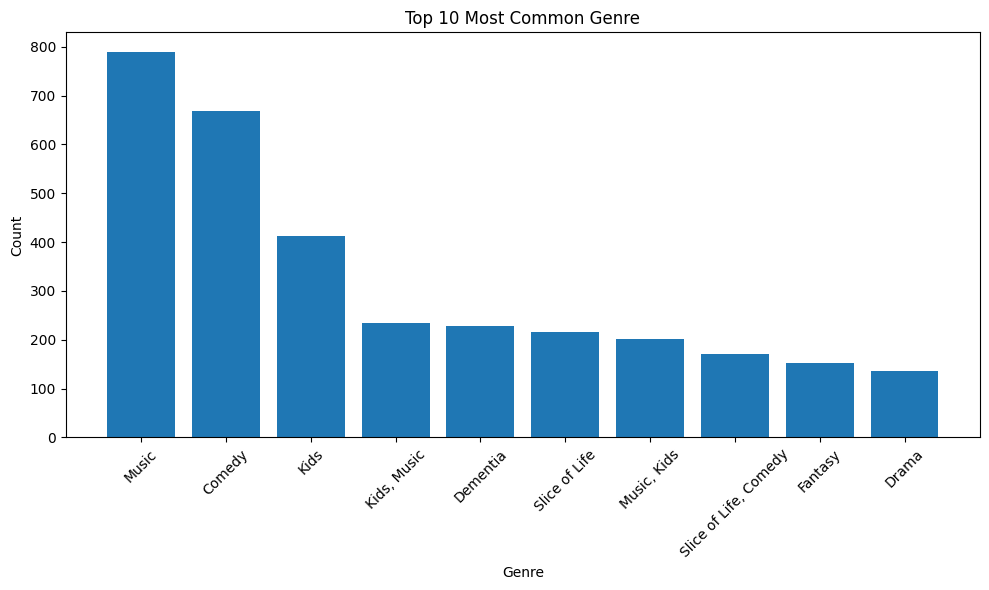

In [16]:
#Count the number for each genre
genre_count = anime_df['Genres'].value_counts()

#Selecting the top 10 genres to visualize
n = 10
top_genres = genre_count.head(n)

#Plotting the histogram
plt.figure(figsize=(10,6))
plt.bar(top_genres.index, top_genres.values)

#Adding x and y axis labels
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title(f'Top {n} Most Common Genre')

#Rotate x-axis labels for better readablity
plt.xticks(rotation=45)

#Showing the plot
plt.tight_layout()
plt.show()

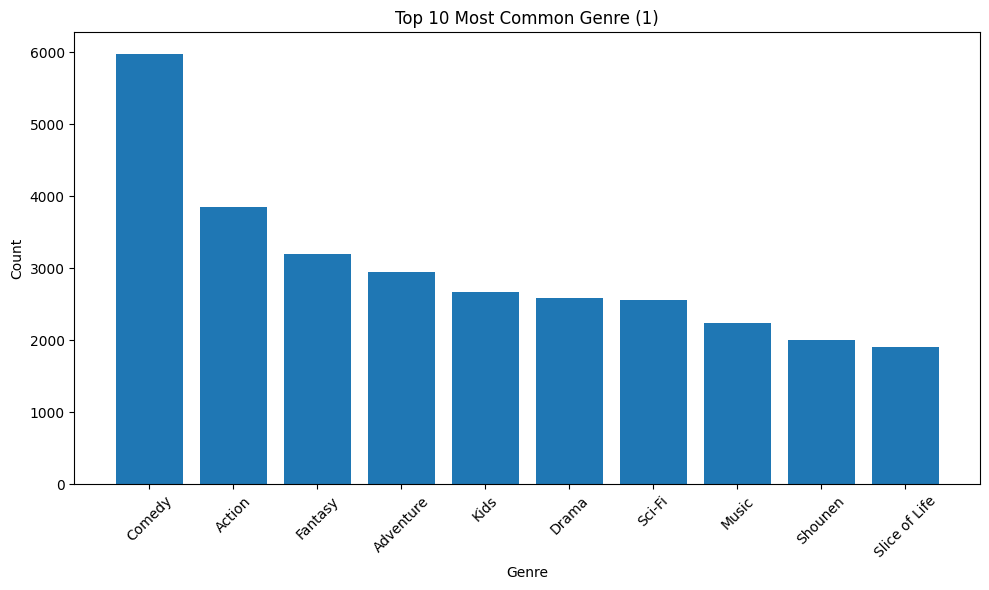

In [19]:
#List for storing unqiue genres
unique_genre = []

#Iterating through each anime's genre list
for genres in anime_df['Genres']:
    unique_genre.extend(genres.split(','))

#Count the number of anime with said genre
genre_counts = dict()
for i in unique_genre:
    i = i.strip()
    genre_counts[i] = genre_counts.get(i,0) + 1

#Showing the top 10 genres
n = 10
sorted_genre = sorted(genre_counts.items(), key= lambda x:x[1], reverse=True)
top_genres = dict(sorted_genre[:n])

#Plotting the histogram
plt.figure(figsize=(10,6))
plt.bar(top_genres.keys(), top_genres.values())

#Adding x and y axis labels
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title(f'Top {n} Most Common Genre (1)')

#Rotate x-axis labels for better readablity
plt.xticks(rotation=45)

#Showing the plot
plt.tight_layout()
plt.show()

